# <center> Task 1: 语音数据预处理及可视化 </center>

## Goal：
1. 语音数据的基本处理操作
2. 对四川和南昌的方言语音提取时域和频域特征，并进行可视化
3. 根据可视化的结果，对比三个地区语音特征的区别

In [99]:
import os
import time
import shutil
from tqdm import tqdm

import random
import sklearn
import numpy as np
import pandas as pd

import wave
import librosa
import contextlib
import IPython
from pydub import AudioSegment
from pydub.silence import detect_silence, detect_nonsilent

import matplotlib.pyplot as plt

In [100]:
wav_path = "./data/wav/"
train_set=[f"./data/wav/train/{file}" for file in os.listdir(wav_path+"train/")]
test_set=[f"./data/wav/test/{file}" for file in os.listdir(wav_path+"test/")]

## 语音数据的基本处理操作

如何加载一个音频文件；
音频数据集EDA 包括测试、训练集的时长分布

### 语音数据基本信息

In [101]:
random.seed(1991)
test_audio_path=random.choice(train_set)
with wave.open(test_audio_path, "rb") as f:
    print(test_audio_path)
    print(f.getparams())

./data/wav/train/nanchang_speaker_11_121.wav
_wave_params(nchannels=1, sampwidth=2, framerate=16000, nframes=69690, comptype='NONE', compname='not compressed')


In [102]:
data, sr = librosa.load(test_audio_path, sr=16000)
IPython.display.Audio(data, rate=sr)

### 时长分布

In [103]:
train_dur=[]
test_dur=[]

def load_files(list1, files):
	for idx, file in enumerate(files):
		if not os.path.isdir(file):
			print(f"percent: {(idx+1)/len(files):.2%}", end="\r")
			f=wave.open(file)
			rate=f.getframerate()
			frames=f.getnframes()
			duration=frames/float(rate)
			list1.append(duration)
	print("all files loaded")

load_files(train_dur, train_set)
load_files(test_dur, test_set)


all files loaded
all files loaded


In [104]:
print(f"train samples: {len(train_dur)}",
      f"test samples: {len(test_dur)}", sep="\n")

train samples: 18000
test samples: 1500


Text(0.5, 1.0, 'test set')

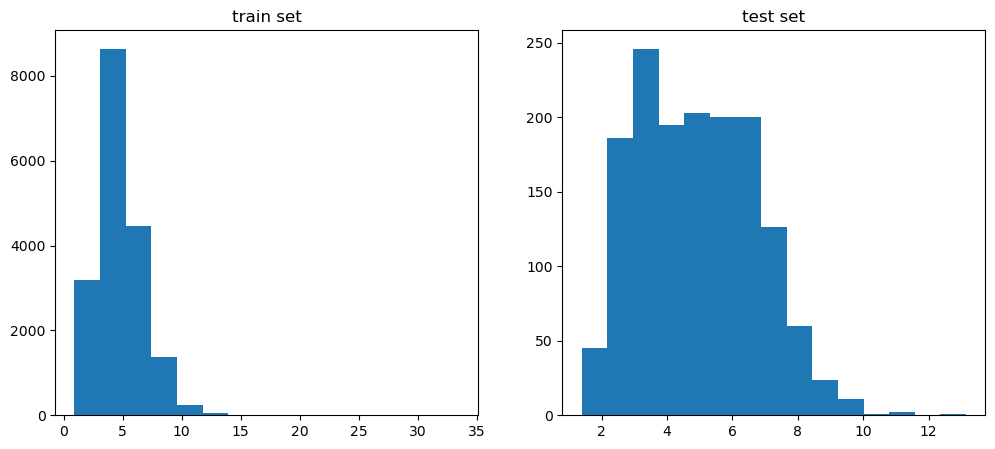

In [105]:
fig, ax=plt.subplots(1,2)
fig.set_figwidth(12)
fig.set_figheight(5)

ax[0].hist(train_dur,bins=15)
ax[0].set_title("train set")

ax[1].hist(test_dur,bins=15)
ax[1].set_title("test set")

## Time Domain Analysis & Frequency Domain Analysis

### Time Domain

In [106]:
nan_chang=[]
si_chuan=[]
chang_sha=[]
for file in train_set:
    if "nanchang" in file:
        nan_chang.append(file)
        continue
    if "sichuan" in file:
        si_chuan.append(file)
        continue
    if "changsha" in file:
        chang_sha.append(file)
        continue

nan_chang=np.array(nan_chang)
si_chuan=np.array(si_chuan)
chang_sha=np.array(chang_sha)

In [107]:
print(len(nan_chang),
      len(si_chuan))

6000 6000


In [108]:
random.seed(1991)
file2=random.choice(nan_chang)
file3=random.choice(si_chuan)
files=np.hstack([file2, file3])

In [109]:
colors = ['orange', 'mediumorchid'] 
location = ['sichuan', 'nanchang']

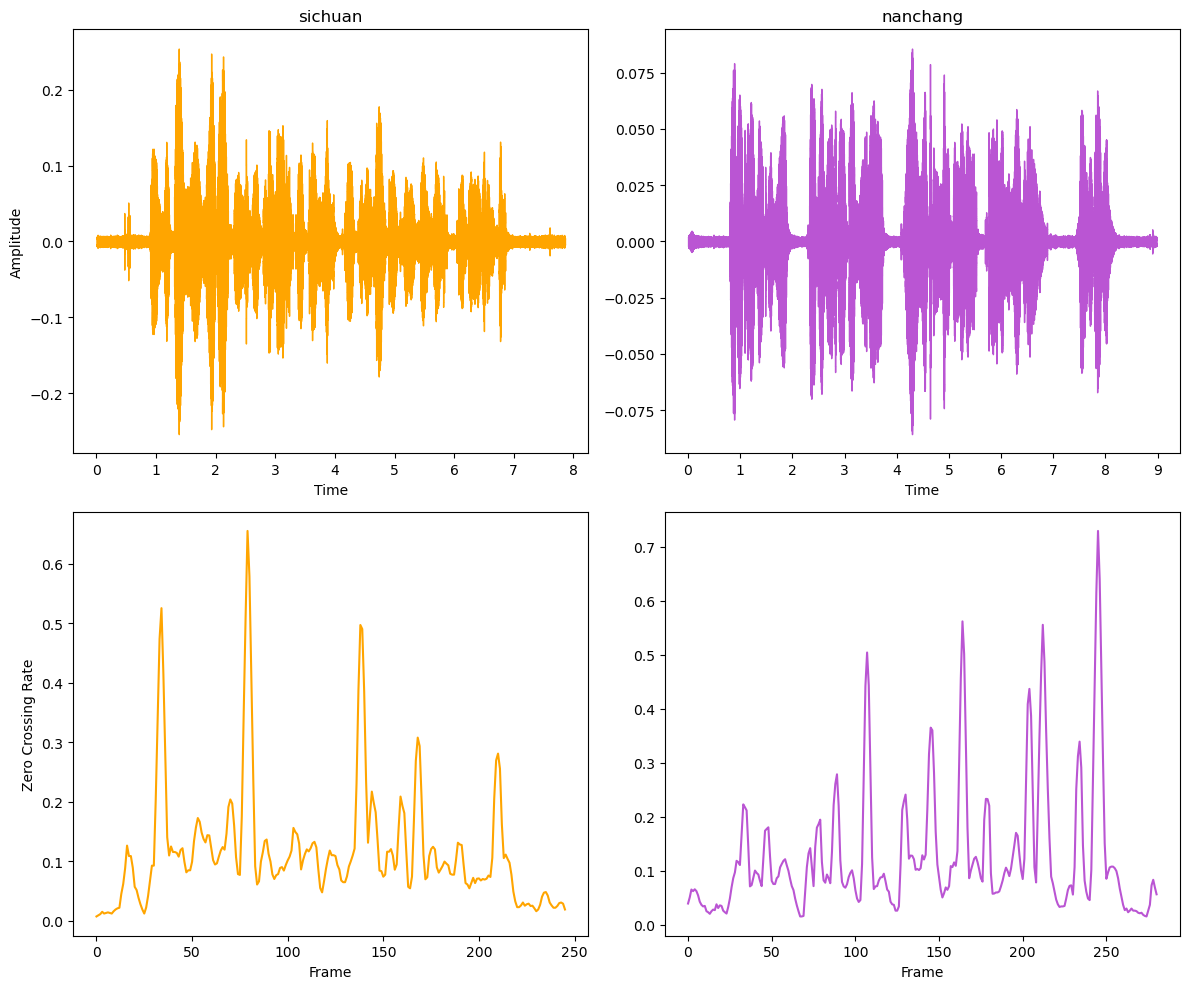

In [110]:
colors = ['orange', 'mediumorchid']
location = ['sichuan', 'nanchang']

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

for i in range(2):
    data, sr = librosa.load(files[i], sr=16000)
    
    # Waveform plot
    librosa.display.waveshow(data, sr=sr, color=colors[i], ax=axs[0, i])
    axs[0, i].set_title(location[i])
    if i == 0:
        axs[0, i].set_ylabel("Amplitude")
    
    # Zero crossing rate plot
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y=data)[0]
    axs[1, i].plot(zero_crossing_rate, color=colors[i])
    axs[1, i].set_xlabel('Frame')
    if i == 0:
        axs[1, i].set_ylabel('Zero Crossing Rate')

plt.tight_layout()
plt.show()

#### Zero Crossing Rate

**过零率 (Zero Crossing Rate，ZCR)** ：每帧中语音信号通过零点 (从正变为负或从负变为正) 的次数占比，它是对敲击的声音的分类的关键特征。

**帧**：进行语音信号处理时，为减少语音信号整体的非稳态、时变的影响，对语音信号进行分段处理，其中每一段称为一帧，帧长一般取 25ms。

过零率反映的是主要波形变化，主要频率越高过零率越大，一般而言，噪音及清音的过零率大于浊音。为了比较三地方言的过零率是否存在相对大小或不同特征，进一步绘制分组箱线图。

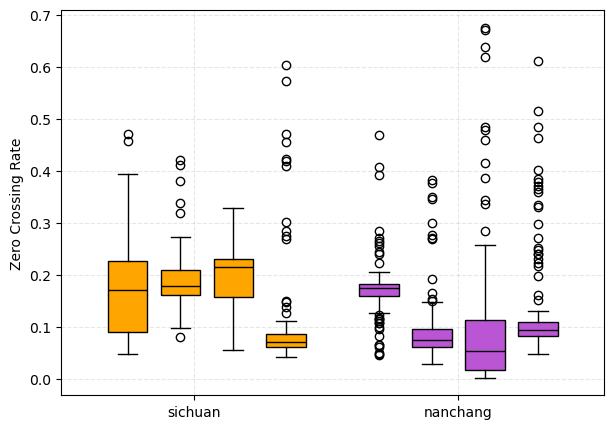

In [111]:
random.seed(1991)
plt.figure(figsize = (7, 5), dpi = 100)

zero = []
for i in range(4):
    data, sample_rate = librosa.load(si_chuan[i], sr = 16000)
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y = data)[0]
    zero.append(zero_crossing_rate)
bplot2 = plt.boxplot(zero, patch_artist=True, positions=(2.9,3.3,3.7,4.1),
                     widths=0.3, medianprops={'color': 'black'}) 
for patch in bplot2['boxes']:
    patch.set_facecolor('orange')


zero = []
for i in range(4):
    data, sample_rate = librosa.load(nan_chang[i], sr = 16000)
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y = data)[0]
    zero.append(zero_crossing_rate)
bplot3 = plt.boxplot(zero, patch_artist=True, positions=(4.8,5.2,5.6,6.0),
                     widths=0.3, medianprops={'color': 'black'}) 
for patch in bplot3['boxes']:
    patch.set_facecolor('mediumorchid')
    
x_position=[3,5]
x_position_fmt = ['sichuan', 'nanchang']
plt.xticks([i + 0.8 / 2 for i in x_position], x_position_fmt)

plt.ylabel('Zero Crossing Rate')
plt.grid(linestyle = "--", alpha = 0.3)
plt.show()

### Frequency Domain

Fourier Transform
$$
F(\omega) = \int^{\infty}_{-\infty} f(x)e^{-i\omega x}dx
$$

(STFT) Short Time Fourier Transforms

In [112]:
random.seed(1991)
n_fft = 2048
file4=random.choice(si_chuan)
data, sr=librosa.load(file4, sr=16000)
stft_data=np.abs(librosa.stft(y=data, n_fft=n_fft))

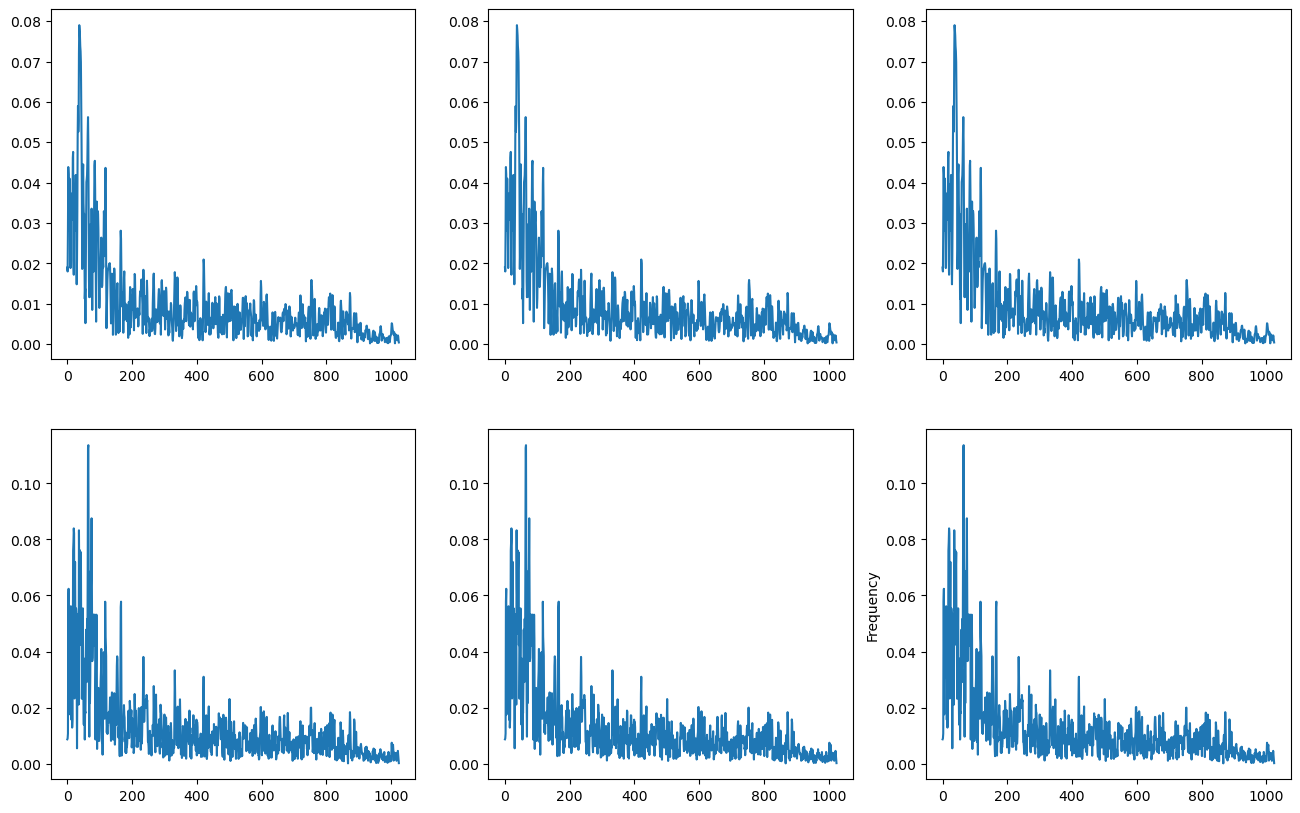

In [113]:
fig, axs = plt.subplots(2, 3, figsize=(16, 10))
for i in range(2):
    for j in range(3):
        axs[i,j].plot(stft_data[:,i])
        axs[i,j].xlabel=("")
        if (i%3)==0:
            plt.ylabel("Frequency")

### 频谱图(Spectograms)

**频谱图**：横坐标表示时间，纵坐标表示频率，坐标点值为语音数据能量。由于是采用二维平面表达三维信息，所以能量值的大小通过颜色来表示，颜色越深表示该点的语音能量越强。

**频率**：发声物体或声源每秒振动的次数，单位是赫兹Hz

**能量**：表示声音的大小

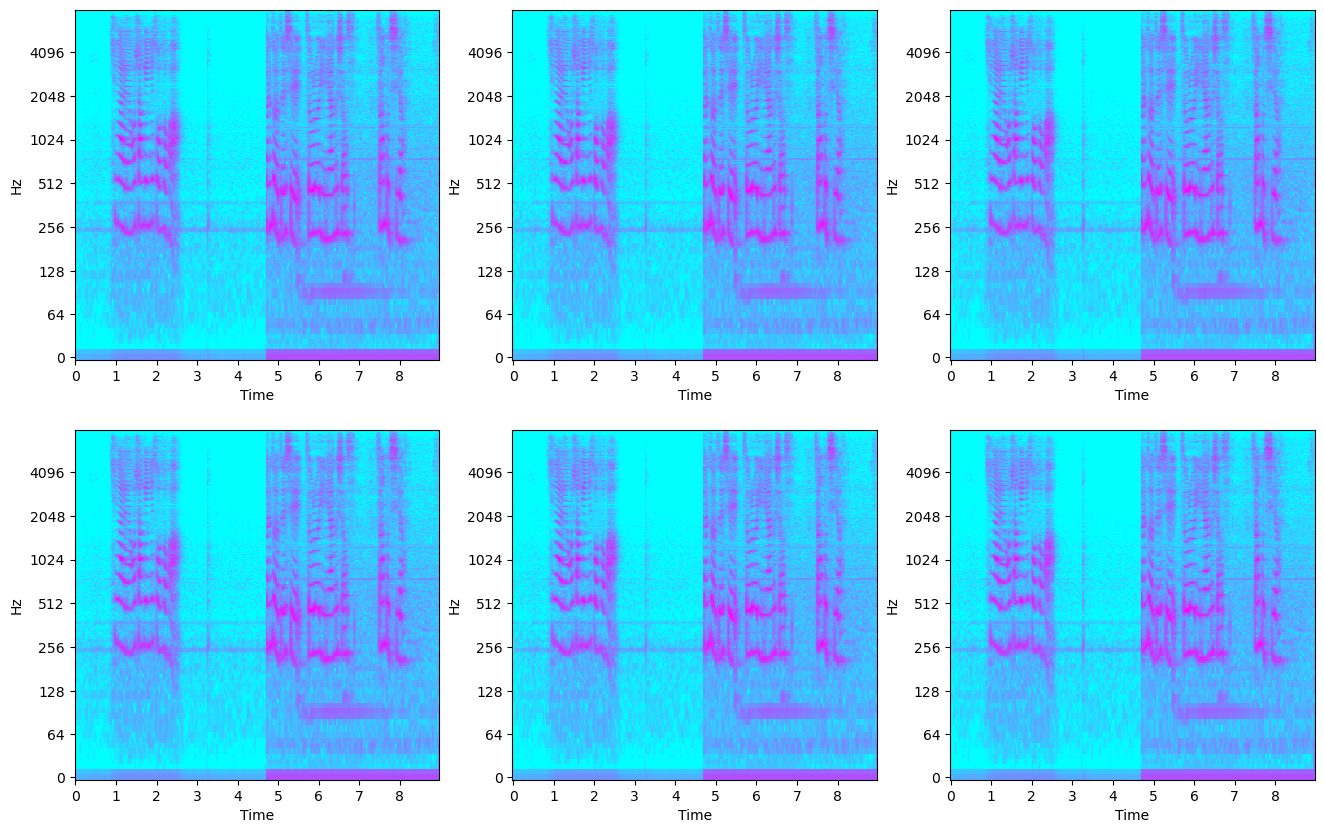

In [114]:
random.seed(1991)
files=random.sample(list(si_chuan), 6)
fig, axs = plt.subplots(2, 3, figsize=(16, 10))
for k in range(4):
    for i in range(2):
        for j in range(3):
            data, sr=librosa.load(files[k], sr=16000)
            stft_data=np.abs(librosa.stft(y=data, n_fft=n_fft))
            DB=librosa.amplitude_to_db(stft_data)
            librosa.display.specshow(data=DB, sr=sr, x_axis="time", y_axis="log", cmap="cool", ax=axs[i, j])

### 色度谱图(Chromagram)

**色度向量**：一个含有12个元素的向量，分别代表一段时间 (如1帧) 内12个音级中的能量，不同八度 (音高，pitch) 的同一音级能量累加。

**色度谱图**：加入时间信息后的色度向量的序列。

**音级**：使用ABCDEFG七个英文字母外加升降号来表示十二平均律中的十二个音，由于C大调的流行，这七个字母的顺序常常是CDEFGAB，C大调中C = Do


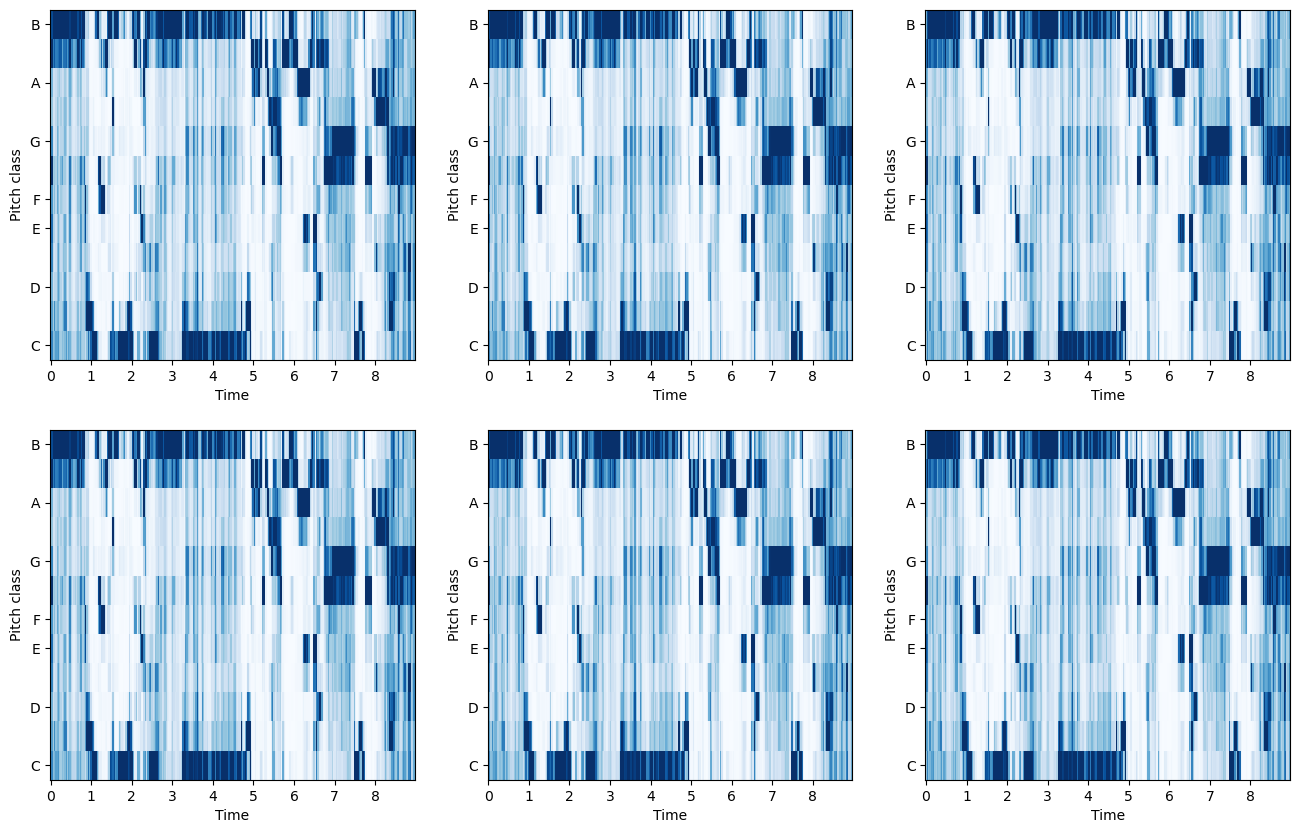

In [115]:
random.seed(1991)
files=random.sample(list(si_chuan), 6)
fig, axs = plt.subplots(2, 3, figsize=(16, 10))
for k in range(4):
    for i in range(2):
        for j in range(3):
            data, sr=librosa.load(files[k], sr=16000)
            chromagram=librosa.feature.chroma_stft(y=data, sr=sr)
            librosa.display.specshow(data=chromagram, sr=sr, x_axis="time", y_axis="chroma", cmap="Blues", ax=axs[i, j])

### 梅尔频谱图 (Mel Spectograms)

预处理，删除静音片段

`detect_silence`:
Returns a list of all silent sections [start, end] in milliseconds of audio_segment. Inverse of detect_nonsilent()

In [116]:
def pad_trunc(in_path, out_path, hold, thres):
    files=os.listdir(in_path)
    for i in tqdm(range(len(files))):
        file = files[i]
        f = AudioSegment.from_wav(in_path+file)
        start_end=detect_silence(f, hold, thres, 1)
        if len(start_end)>1:
            truncf=f[start_end[0][1]:start_end[len(start_end)-1][0]]
            # 去掉开头和结尾的静音片段
        elif len(start_end)==1:
            if start_end[0][0]<=len(f)-start_end[0][1]:
                truncf=f[start_end[0][1]:]
            else:
                truncf=f[0:start_end[0][0]]
        else:
            truncf=f
        truncf.export(out_path+file, format="wav")

In [117]:
pad_trunc_path='./data/PadTrunc/'
flag=0
# 若flag为1，则重新生成数据
if flag==1:
    if os.path.exists(pad_trunc_path):
        shutil.rmtree(pad_trunc_path)
        os.mkdir(pad_trunc_path)
        os.mkdir(pad_trunc_path + 'train/')
        os.mkdir(pad_trunc_path + 'test/')
    else:
        os.mkdir(pad_trunc_path)
        os.mkdir(pad_trunc_path + 'train/')
        os.mkdir(pad_trunc_path + 'test/')

if flag==1:
    pad_trunc(train_set, pad_trunc_path+'train/', 1000, -50)
    pad_trunc(test_set, pad_trunc_path+'test/', 1000, -50)

In [118]:
PadTrunc_path = './data/PadTrunc/'
train_set=[f"./data/PadTrunc/train/{file}" for file in os.listdir(PadTrunc_path+"train/")]
test_set=[f"./data/PadTrunc/test/{file}" for file in os.listdir(PadTrunc_path+"test/")]

train_dur = []
test_dur = []

def load_files(list1, files):
	for idx, file in enumerate(files):
		if not os.path.isdir(file):
			print(f"percent: {(idx+1)/len(files):.2%}", end="\r")
			f=wave.open(file)
			rate=f.getframerate()
			frames=f.getnframes()
			duration=frames/float(rate)
			list1.append(duration)
	print("all files loaded")

load_files(train_dur, train_set)
load_files(test_dur, test_set)

print(f"train samples: {len(train_dur)}",
      f"test samples: {len(test_dur)}", sep="\n")

all files loaded
all files loaded
train samples: 18000
test samples: 1500


Text(0.5, 1.0, 'Testing Dataset (After Truncation)')

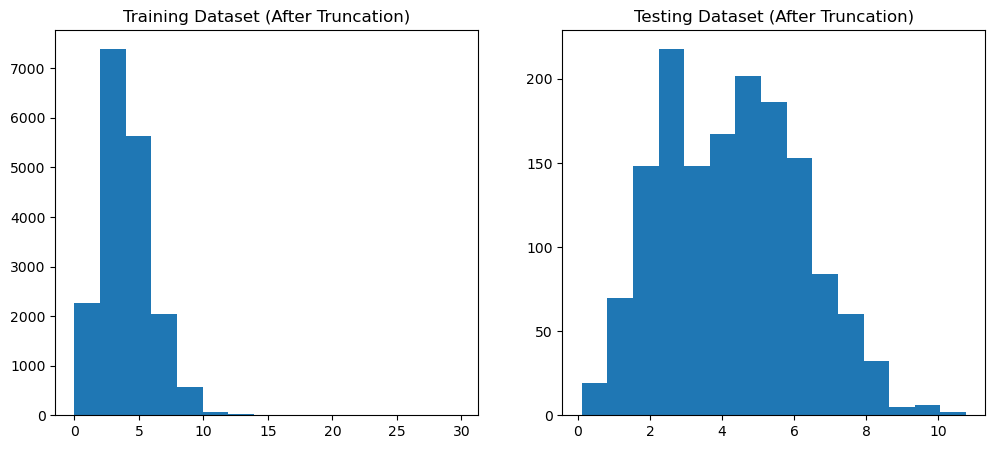

In [119]:
fig, ax = plt.subplots(1,2)
fig.set_figwidth(12)
fig.set_figheight(5)

ax[0].hist(train_dur, bins = 15)
ax[0].set_title('Training Dataset (After Truncation)')
ax[1].hist(test_dur, bins = 15)
ax[1].set_title('Testing Dataset (After Truncation)')

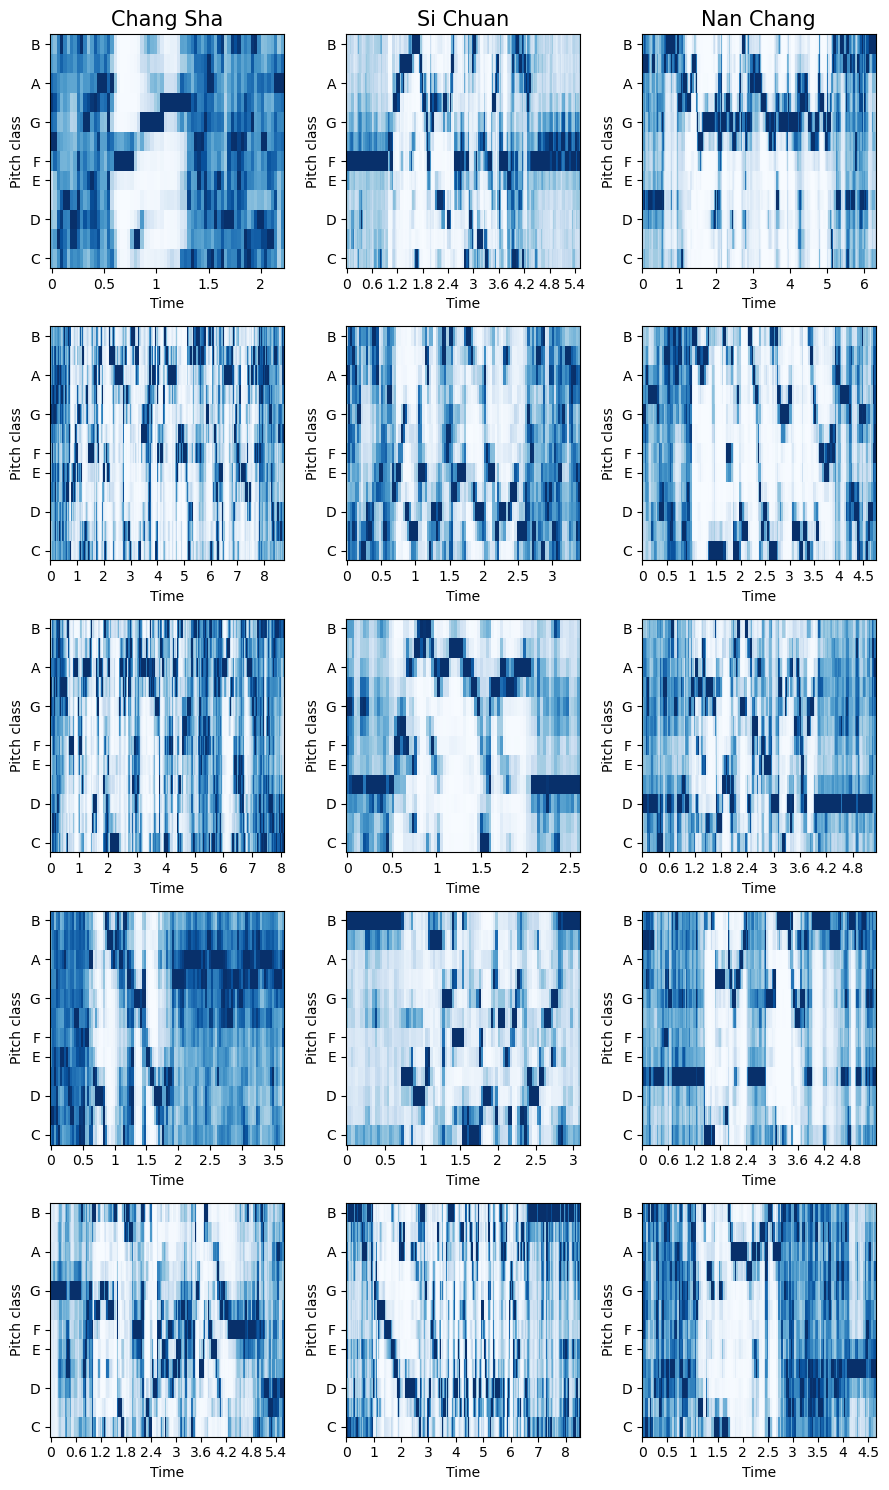

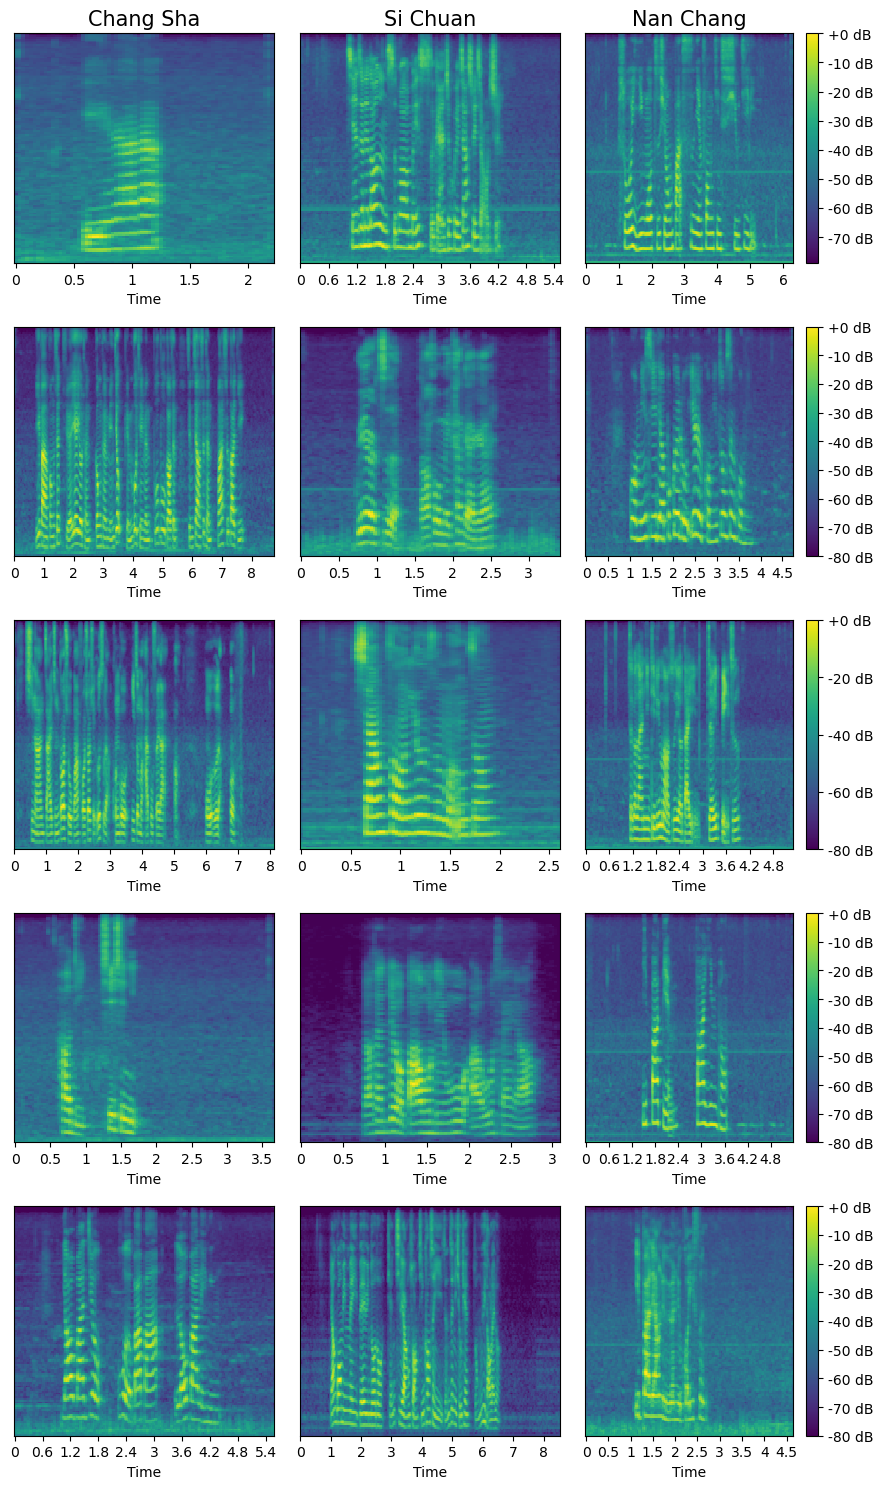

In [132]:
random.seed(1991)
filenames1 = random.sample(list(chang_sha), 5)
filenames2 = random.sample(list(si_chuan), 5)
filenames3 = random.sample(list(nan_chang), 5)
filenames=[filenames1,filenames2,filenames3]
titles = ["Chang Sha", "Si Chuan", "Nan Chang"]

fig, axs=plt.subplots(5,3, figsize=(9,3*len(filenames[i])))
for i in range(3):
	axs[0, i].set_title(titles[i], fontsize=15)
	for j in range(len(filenames[i])):
		data, sr = librosa.load(filenames[i][j], sr = 16000)
		chromagram=librosa.feature.chroma_stft(y=data, sr=sr)
		img = librosa.display.specshow(data=chromagram, sr=sr, ax=axs[j, i], x_axis="time", y_axis="chroma", cmap="Blues")
plt.tight_layout()
plt.show()

fig, axs=plt.subplots(5,3, figsize=(9,3*len(filenames[i])))
for i in range(3):
	axs[0, i].set_title(titles[i], fontsize=15)
	for j in range(len(filenames[i])):
		data, sr = librosa.load(filenames[i][j], sr = 16000)
		mel_spec = librosa.feature.melspectrogram(y=data, sr = sr)                        
		mel_spec_db = librosa.power_to_db(mel_spec, ref = np.max)                                  
		img = librosa.display.specshow(mel_spec_db, sr=sr, ax=axs[j, i], x_axis="time", cmap='viridis')
		if i == 2:
			fig.colorbar(img, ax=axs[j, i], format='%+2.0f dB')
plt.tight_layout()
plt.show()

直观来说：
- 频谱复杂度: 四川地区的语音频谱最为复杂，能量分布较为广泛且均匀，而长沙地区的语音频谱相对简单，主要集中在低频区域。南昌的语音频谱复杂度介于两者之间。
- 时长差异: 长沙的语音片段较短，而四川和南昌的语音片段较长，这可能与不同地区的语言习惯和语速有关。
- 能量分布: 三个地区的语音信号在频率分布上都有明显区别。长沙的频率成分主要集中在低频，显示出该地区的语音音调较低。四川的频率成分较为广泛，表明该地区的语音包含更多的音素变化。南昌的语音能量分布较为均匀，但相对简单，频率分布较为集中。

In [133]:
%matplotlib inline 
def MelSpec(inPath, outPath):
    files = os.listdir(inPath)
    for i in tqdm(range(len(files))):
        file = files[i]
        data, sample_rate = librosa.load(inPath + file, sr = 16000)
        mel_spec = librosa.feature.melspectrogram(y=data, sr = sample_rate)
        mel_spec_db = librosa.power_to_db(mel_spec, ref = np.max)
        fig = plt.figure()
        plt.subplots_adjust(top = 1, bottom = 0, right = 1, 
                            left = 0, hspace = 0, wspace = 0)
        plt.margins(0, 0)
        img = librosa.display.specshow(data = mel_spec_db, sr = sample_rate)
        area = file[0:file.find('_')]
        speaker = file.replace('.wav', '')
        plt.savefig(outPath + area + '/' + speaker + '.jpg', pad_inches = 0)
        plt.close()

In [ ]:
MelSpec_path = './data/MelSpec/'

flag = 0
if flag==1:
    if os.path.exists(MelSpec_path):
        shutil.rmtree(MelSpec_path)
        os.mkdir(MelSpec_path)
        os.mkdir(MelSpec_path + 'train/')
        os.mkdir(MelSpec_path + 'test/')
        os.mkdir(MelSpec_path + 'train/changsha/')
        os.mkdir(MelSpec_path + 'train/nanchang/')
        os.mkdir(MelSpec_path + 'train/sichuan/')
        os.mkdir(MelSpec_path + 'test/changsha/')
        os.mkdir(MelSpec_path + 'test/nanchang/')
        os.mkdir(MelSpec_path + 'test/sichuan/')
    else:
        os.mkdir(MelSpec_path)
        os.mkdir(MelSpec_path + 'train/')
        os.mkdir(MelSpec_path + 'test/')
        os.mkdir(MelSpec_path + 'train/changsha/')
        os.mkdir(MelSpec_path + 'train/nanchang/')
        os.mkdir(MelSpec_path + 'train/sichuan/')
        os.mkdir(MelSpec_path + 'test/changsha/')
        os.mkdir(MelSpec_path + 'test/nanchang/')
        os.mkdir(MelSpec_path + 'test/sichuan/')

In [ ]:
if flag==1:
    MelSpec(PadTrunc_path+'train/', MelSpec_path+'train/')
    MelSpec(PadTrunc_path+'test/', MelSpec_path+'test/')